In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
redshifts = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - redshifts.csv',delimiter=',',dtype='str')
names1 = redshifts[:,0]
redshift = [float(l) for l in redshifts[:,1]]

loglbols = np.loadtxt('/home/bartosz/Downloads/highz sample redshifts - Lbol.csv',delimiter=',',dtype='str')
names2 = loglbols[:,0]
loglbol = [float(l) for l in loglbols[:,1]]
loglbol_plus = [float(l) for l in loglbols[:,2]]
loglbol_minus = [float(l) for l in loglbols[:,3]]

# mag = -2.5*np.log10(10**(np.array(loglbol)-7))+71.197425
# mag
names1[11]

'ATLASJ029.9915-36.5658'

In [9]:
mag = -2.5*np.array(loglbol)+71.197425
print(mag)


[-47.052575 -46.952575 -47.177575 -47.052575 -46.802575 -46.977575
 -46.952575 -47.652575 -47.702575 -47.527575 -46.977575 -46.552575
  71.197425  71.197425 -45.505075  71.197425 -45.785075 -46.090075
 -46.365075 -46.952575 -47.152575 -46.610075 -46.177575 -46.057575
 -47.952575 -47.227575 -47.552575 -49.177575 -47.702575 -48.427575
 -46.502575 -47.102575 -46.902575 -47.227575]


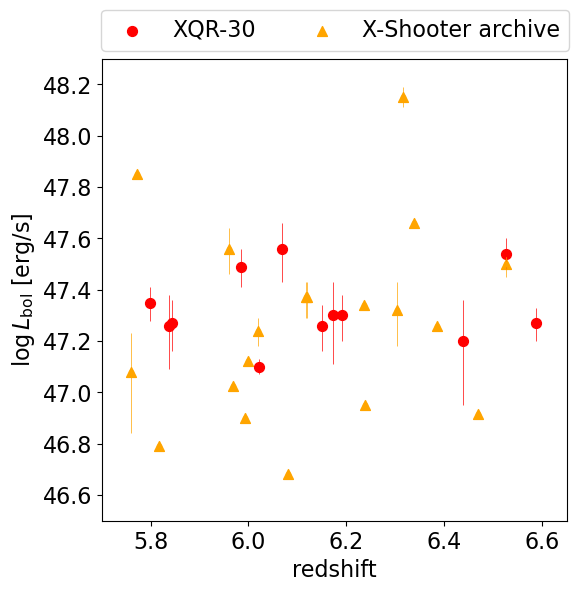

In [86]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(6,6))
plt.scatter(redshift[:12],loglbol[:12],color='red',marker='o',s=50,label='XQR-30')
plt.errorbar(redshift[:12],loglbol[:12],yerr=[loglbol_minus[:12],loglbol_plus[:12]],fmt='.',color='red',lw=0.5)
plt.scatter(redshift[12:],loglbol[12:],color='orange',marker='^',s=50,label='X-Shooter archive')
plt.errorbar(redshift[12:],loglbol[12:],yerr=[loglbol_minus[12:],loglbol_plus[12:]],fmt='.',color='orange',lw=0.5)
plt.xlim(5.7,6.65)
plt.ylim(46.5,48.3)
plt.xlabel('redshift')
plt.ylabel(r'$\log L_\text{bol}$ [erg/s]')
plt.legend(loc='upper left', bbox_to_anchor=(-0.025,1.13),ncol=2)
# plt.savefig('plots/highz_distr.pdf',bbox_inches='tight')
plt.show()

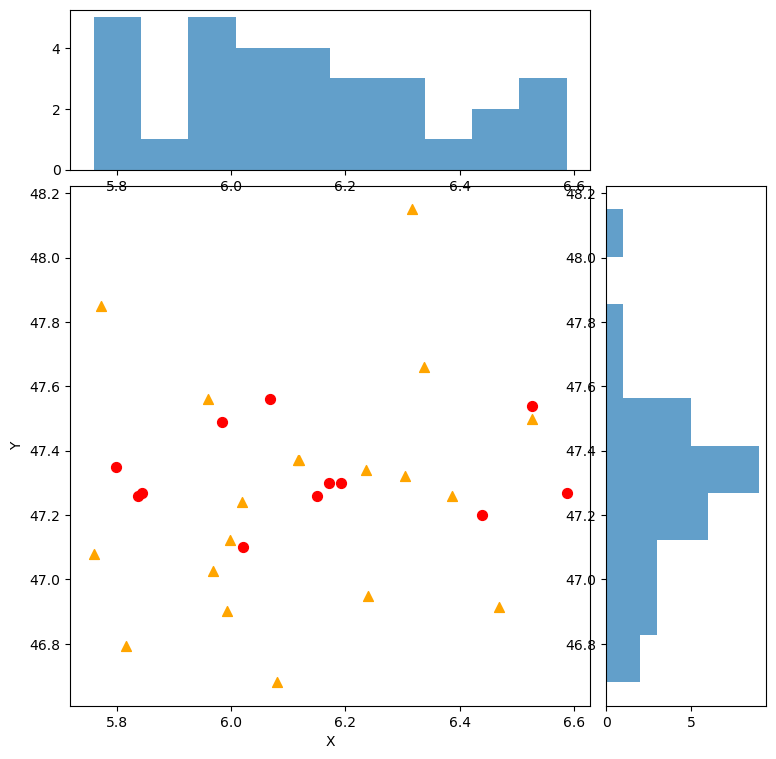

In [69]:
import matplotlib.pyplot as plt
import numpy as np

mask = np.array(loglbol) != 0
Z = np.array(redshift)[mask]
L = np.array(loglbol)[mask]

# Step 2: Create figure and axes with specific grid layout
fig = plt.figure(figsize=(8, 8))
ax_scatter = plt.axes([0.1, 0.1, 0.65, 0.65])  # Scatter plot

# Step 3: Plot the scatter plot
ax_scatter.scatter(Z[:12],L[:12],color='red',marker='o',s=50)
# ax_scatter.errorbar(Z[:12],L[:12],yerr=[loglbol_minus[:12],loglbol_plus[:12]],fmt='.',color='red',lw=0.5)
ax_scatter.scatter(Z[12:],L[12:],color='orange',marker='^',s=50)
# ax_scatter.errorbar(Z[12:],L[12:],yerr=[loglbol_minus[12:],loglbol_plus[12:]],fmt='.',color='orange',lw=0.5)



ax_histx = plt.axes([0.1, 0.77, 0.65, 0.2], sharex=ax_scatter)  # X histogram
ax_histy = plt.axes([0.77, 0.1, 0.2, 0.65], sharey=ax_scatter)  # Y histogram


# Step 4: Plot the histograms
ax_histx.hist(Z, bins=10, alpha=0.7)
ax_histy.hist(L, bins=10, orientation='horizontal', alpha=0.7)

# # Step 5: Remove labels on marginal histograms
# ax_histx.set_xticks([])
# ax_histy.set_yticks([])
# ax_histx.set_yticks([])
# ax_histy.set_xticks([])

# ax_scatter.set_xticks([5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5])

# Step 6: Add titles and labels
ax_scatter.set_xlabel('X')
ax_scatter.set_ylabel('Y')

# Show the plot
plt.show()


[ True  True  True  True  True  True  True  True  True  True  True  True
 False False  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


/home/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/bartosz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

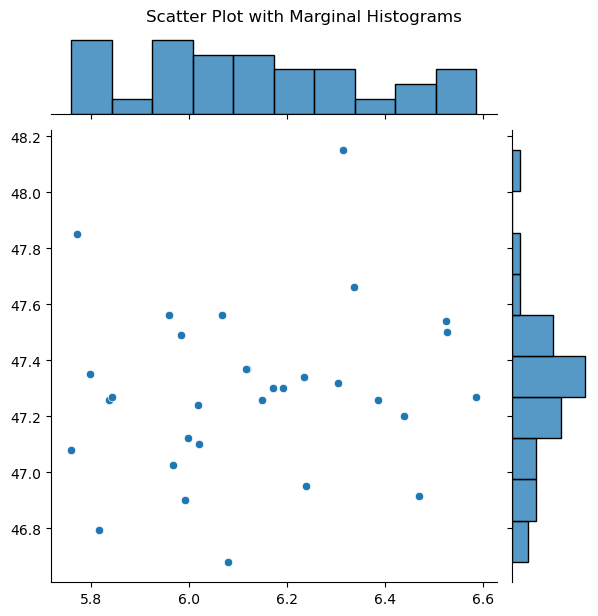

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mask = np.array(loglbol) != 0
print(mask)
# Step 2: Create the main scatter plot with marginal histograms
sns.jointplot(x=np.array(redshift)[mask], y=np.array(loglbol)[mask], kind="scatter", marginal_kws=dict(bins=10, fill=True))

# Step 3: Customize the plot
plt.suptitle('Scatter Plot with Marginal Histograms', y=1.02)
plt.show()
